In [1]:
import pandas as pd
import random
import itertools
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#%config InlineBackend.figure_format='png'
%matplotlib inline

import calendar

import numpy as np

In [34]:
''' download = False

if download:
    dates = ['180526', '180602', '180609', '180616']
    
    mta_df = []
    
    for date in dates:
        url = f'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{date}.txt'
        print(f'downloading {url}')
        
        mta_df.append(
            pd.read_csv(url)
        )

    df = pd.concat(mta_df)
    df.to_csv('turn_mta.csv')
else:
    df = pd.read_csv('turn_mta.csv', index_col=0)'''

" download = False\n\nif download:\n    dates = ['180526', '180602', '180609', '180616']\n    \n    mta_df = []\n    \n    for date in dates:\n        url = f'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{date}.txt'\n        print(f'downloading {url}')\n        \n        mta_df.append(\n            pd.read_csv(url)\n        )\n\n    df = pd.concat(mta_df)\n    df.to_csv('turn_mta.csv')\nelse:\n    df = pd.read_csv('turn_mta.csv', index_col=0)"

In [35]:
df = pd.read_csv('pared_turnstile.csv', index_col=0)

 Read the csv file
 

In [36]:
df.reset_index(inplace=True, drop=True)

Downloaded data from: http://web.mta.info/developers/turnstile.html

Documentations at: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

Map of the MTA system: http://web.mta.info/maps/submap.html

In [37]:
df.head()

,STATION,ENTRIES,EXITS,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,zipcode,hir,TRAFFIC
0,59 ST,6625470,2245312,2018-05-19 00:00:00,24.0,2.0,10022.0,10610.0,26.0
1,59 ST,6625494,2245314,2018-05-19 04:00:00,20.0,24.0,10022.0,10610.0,44.0
2,59 ST,6625514,2245338,2018-05-19 08:00:00,81.0,77.0,10022.0,10610.0,158.0
3,59 ST,6625595,2245415,2018-05-19 12:00:00,196.0,66.0,10022.0,10610.0,262.0
4,59 ST,6625791,2245481,2018-05-19 16:00:00,227.0,39.0,10022.0,10610.0,266.0


In [6]:
df.columns

Index(['STATION', 'ENTRIES', 'EXITS', 'DATETIME', 'ENTRY_DIFFS', 'EXIT_DIFFS',
       'zipcode', 'hir', 'TRAFFIC'],
      dtype='object')

In [8]:
backup_df = df.copy()

In [9]:
df.dtypes


STATION         object
ENTRIES          int64
EXITS            int64
DATETIME        object
ENTRY_DIFFS    float64
EXIT_DIFFS     float64
zipcode        float64
hir            float64
TRAFFIC        float64
dtype: object

In [11]:
df.head()

,STATION,ENTRIES,EXITS,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,zipcode,hir,TRAFFIC
0,59 ST,6625470,2245312,2018-05-19 00:00:00,24.0,2.0,10022.0,10610.0,26.0
1,59 ST,6625494,2245314,2018-05-19 04:00:00,20.0,24.0,10022.0,10610.0,44.0
2,59 ST,6625514,2245338,2018-05-19 08:00:00,81.0,77.0,10022.0,10610.0,158.0
3,59 ST,6625595,2245415,2018-05-19 12:00:00,196.0,66.0,10022.0,10610.0,262.0
4,59 ST,6625791,2245481,2018-05-19 16:00:00,227.0,39.0,10022.0,10610.0,266.0


In [41]:
df1=df.copy()

In [42]:
df1.dropna().head()

,STATION,ENTRIES,EXITS,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,zipcode,hir,TRAFFIC
0,59 ST,6625470,2245312,2018-05-19 00:00:00,24.0,2.0,10022.0,10610.0,26.0
1,59 ST,6625494,2245314,2018-05-19 04:00:00,20.0,24.0,10022.0,10610.0,44.0
2,59 ST,6625514,2245338,2018-05-19 08:00:00,81.0,77.0,10022.0,10610.0,158.0
3,59 ST,6625595,2245415,2018-05-19 12:00:00,196.0,66.0,10022.0,10610.0,262.0
4,59 ST,6625791,2245481,2018-05-19 16:00:00,227.0,39.0,10022.0,10610.0,266.0


In [43]:
df.describe()

,ENTRIES,EXITS,ENTRY_DIFFS,EXIT_DIFFS,zipcode,hir,TRAFFIC
count,6.374170e+05,6.374170e+05,637417.000000,637417.000000,284373.000000,284373.000000,637417.000000
mean,2.712203e+07,1.977596e+07,213.402501,161.961036,10422.325094,5829.368154,375.363538
std,1.589074e+08,1.305487e+08,264.914522,237.626597,558.210815,4386.788181,395.353848
min,0.000000e+00,0.000000e+00,1.000000,1.000000,10001.000000,260.000000,2.000000
25%,8.410810e+05,4.960020e+05,33.000000,25.000000,10012.000000,2160.000000,85.000000
50%,3.098000e+06,1.852192e+06,120.000000,78.000000,10027.000000,4890.000000,249.000000
75%,7.079300e+06,5.131469e+06,293.000000,201.000000,11104.000000,9360.000000,533.000000
max,2.115507e+09,2.037127e+09,5479.000000,5584.000000,11435.000000,17230.000000,8503.000000


 200,000 entries per day is a reasonable cut-off and removing negative diffs

In [44]:

clean_df = df1[(df1['ENTRY_DIFFS'] < 200000) 
              & (df1['ENTRY_DIFFS'] > 0) 
              & (df1['EXIT_DIFFS'] < 2E5)
              & (df1['EXIT_DIFFS'] > 0)]

In [45]:
clean_df1=clean_df.copy()

In [46]:
clean_df1['TOTAL']=clean_df1['ENTRY_DIFFS']+clean_df1['EXIT_DIFFS']

In [47]:
clean_df1.dtypes

STATION         object
ENTRIES          int64
EXITS            int64
DATETIME        object
ENTRY_DIFFS    float64
EXIT_DIFFS     float64
zipcode        float64
hir            float64
TRAFFIC        float64
TOTAL          float64
dtype: object

In [48]:
clean_df1['DATETIME'] = pd.to_datetime(clean_df1['DATETIME'])


In [49]:
clean_df1['DAYOFWEEK']=clean_df1['DATETIME'].dt.weekday

In [50]:
clean_df1.head()

,STATION,ENTRIES,EXITS,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,zipcode,hir,TRAFFIC,TOTAL,DAYOFWEEK
0,59 ST,6625470,2245312,2018-05-19 00:00:00,24.0,2.0,10022.0,10610.0,26.0,26.0,5
1,59 ST,6625494,2245314,2018-05-19 04:00:00,20.0,24.0,10022.0,10610.0,44.0,44.0,5
2,59 ST,6625514,2245338,2018-05-19 08:00:00,81.0,77.0,10022.0,10610.0,158.0,158.0,5
3,59 ST,6625595,2245415,2018-05-19 12:00:00,196.0,66.0,10022.0,10610.0,262.0,262.0,5
4,59 ST,6625791,2245481,2018-05-19 16:00:00,227.0,39.0,10022.0,10610.0,266.0,266.0,5


In [80]:
len(clean_df1.STATION.unique())

374

In [51]:
clean_df1['DATE']=clean_df1['DATETIME'].dt.date

In [52]:
clean_df1.head()

,STATION,ENTRIES,EXITS,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,zipcode,hir,TRAFFIC,TOTAL,DAYOFWEEK,DATE
0,59 ST,6625470,2245312,2018-05-19 00:00:00,24.0,2.0,10022.0,10610.0,26.0,26.0,5,2018-05-19
1,59 ST,6625494,2245314,2018-05-19 04:00:00,20.0,24.0,10022.0,10610.0,44.0,44.0,5,2018-05-19
2,59 ST,6625514,2245338,2018-05-19 08:00:00,81.0,77.0,10022.0,10610.0,158.0,158.0,5,2018-05-19
3,59 ST,6625595,2245415,2018-05-19 12:00:00,196.0,66.0,10022.0,10610.0,262.0,262.0,5,2018-05-19
4,59 ST,6625791,2245481,2018-05-19 16:00:00,227.0,39.0,10022.0,10610.0,266.0,266.0,5,2018-05-19


total traffic per day grouped by station and date(Summing over 4h total)

In [125]:
grp3=clean_df1.groupby(['STATION','DATE'])['TOTAL'].sum()

In [126]:
grp4=grp3.reset_index()

In [127]:
grp4.head()

,STATION,DATE,TOTAL
0,1 AV,2018-05-19,41220.0
1,1 AV,2018-05-20,32031.0
2,1 AV,2018-05-21,45349.0
3,1 AV,2018-05-22,48074.0
4,1 AV,2018-05-23,48745.0


Median daily traffic  grouped by station

In [128]:
top=grp4.groupby(['STATION'])['TOTAL'].median()

In [129]:
top.head()


STATION
1 AV             45644.0
103 ST           56165.0
103 ST-CORONA    34354.5
104 ST            4418.0
110 ST           20811.0
Name: TOTAL, dtype: float64

In [133]:
 top1=top.sort_values()

In [135]:
top2=top1.tail(20)

Text(0.5,1,' Top 20 Stations by Median Daily Traffic  ')

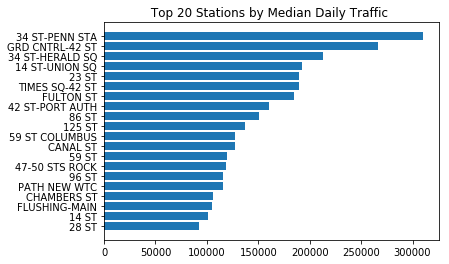

In [136]:
plt.figsize=[20,8]

plt.barh( top2.index,top2.values)
plt.title(' Top 20 Stations by Median Daily Traffic  ')
#ax = plt.gca()

In [138]:
def weekend(x):
    if x <= 4:
        return 1
    else:
        return 0

Furnction returns 0 for weekend and 1 for weekday

In [139]:
clean['WEEKDAY']=clean_df1['DAYOFWEEK'].apply(weekend)

In [142]:
clean_df1.reset_index(inplace=True,drop=True)

In [143]:
clean_df1.head()

,STATION,ENTRIES,EXITS,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,zipcode,hir,TRAFFIC,TOTAL,DAYOFWEEK,DATE,WEEKDAY
0,59 ST,6625470,2245312,2018-05-19 00:00:00,24.0,2.0,10022.0,10610.0,26.0,26.0,5,2018-05-19,0
1,59 ST,6625494,2245314,2018-05-19 04:00:00,20.0,24.0,10022.0,10610.0,44.0,44.0,5,2018-05-19,0
2,59 ST,6625514,2245338,2018-05-19 08:00:00,81.0,77.0,10022.0,10610.0,158.0,158.0,5,2018-05-19,0
3,59 ST,6625595,2245415,2018-05-19 12:00:00,196.0,66.0,10022.0,10610.0,262.0,262.0,5,2018-05-19,0
4,59 ST,6625791,2245481,2018-05-19 16:00:00,227.0,39.0,10022.0,10610.0,266.0,266.0,5,2018-05-19,0


get the sum of total traffic by day , weekday and station

In [149]:
df_day=clean_df1.groupby(['STATION','DATE','WEEKDAY'])['TOTAL'].sum()

In [167]:
df_day.head()

STATION  DATE        WEEKDAY
1 AV     2018-05-19  0          41220.0
         2018-05-20  0          32031.0
         2018-05-21  1          45349.0
         2018-05-22  1          48074.0
         2018-05-23  1          48745.0
Name: TOTAL, dtype: float64

In [160]:
df_h=df_day.reset_index()

unstack  multi indexed data frame after getting the median of daily traffic grouped by weekday  and station

In [161]:
df_w=df_h.groupby(['STATION','WEEKDAY'])['TOTAL'].median().unstack()

In [163]:
df_w.head()

WEEKDAY,0,1
STATION,,
1 AV,33570.0,47349.5
103 ST,29086.0,57683.5
103 ST-CORONA,23258.0,34992.0
104 ST,2045.5,4555.5
110 ST,12098.5,21305.5


calculate the weekday to weekend median traffic ratio of every station

In [164]:
df_w['WEEK_RATIO']=(df_w[1])/(df_w[0])

Remove nan values

In [165]:
final_df=df_w.dropna()

In [166]:
final_df.sort_values(by='WEEK_RATIO')

WEEKDAY,0,1,WEEK_RATIO
STATION,,,
METS-WILLETS PT,17942.0,8237.5,0.459118
AQUEDUCT RACETR,2607.5,2148.5,0.823969
QUEENSBORO PLZ,22377.5,19521.0,0.872349
PRINCE ST,31285.0,28621.0,0.914847
RIT-ROOSEVELT,3062.0,2821.0,0.921293
BOWERY,7572.5,7072.5,0.933972
RIT-MANHATTAN,3289.0,3098.0,0.941928
HIGH ST,15608.5,17907.0,1.147260
BEDFORD AV,50912.5,58593.5,1.150867


In [ ]:
final_df.to_csv("Week_ratio1.csv", sep=',', encoding='utf-8')

Convert the final dataframe to csv file